

```
# This is formatted as code
```

# **Hassana Project**

**Project Summary:**

Our project focuses on developing an object detection system tailored specifically for recognizing various salat postures, including **Ruku** (bowing), **Raising**, **Takbeer** (standing), and **Sujud**. These postures are fundamental components of the Islamic prayer ritual, and accurately detecting them holds significance for aiding individuals in performing prayers correctly and effectively.

 - Leveraging deep learning algorithms and computer vision methodologies, we train our model on annotated datasets comprising images or videos capturing individuals performing the salat.

The system's architecture incorporates advanced neural network models such as YOLO (You Only Look Once) V8,


In [ ]:
# Importing the drive module from Google Colab to mount Google Drive (Authorization).
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import necessary libraries**

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 14.0 MB/s eta 0:00:00


In [ ]:
#determine the text encoding
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:

# Output will always be 'UTF-8'
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install -q mediapipe

In [ ]:
# Import YOLO object detection model from Ultralytics and OpenCV for image processing.

from ultralytics import YOLO # YOLO object detection model
import cv2 # OpenCV for image processing
from google.colab.patches import cv2_imshow # Patched version of cv2_imshow for displaying images in Google Colab

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 78.6MB/s]


# **Visualizing Sample of The Training Dataset**



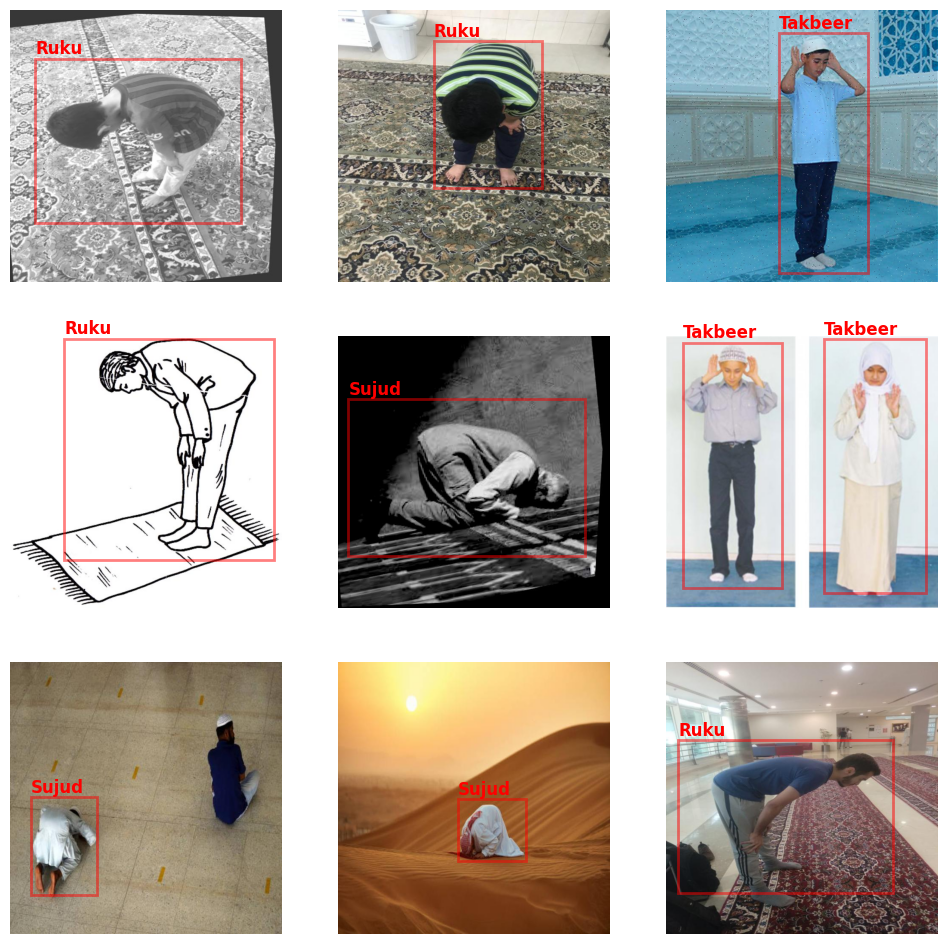

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random
from matplotlib.patches import Rectangle

# Define the class labels
class_labels = {
    0: "Raising",
    1: "Ruku",
    2: "Sujud",
    3: "Takbeer"
}

# Path to the directory containing training images and annotations
data_dir = "/content/drive/MyDrive/Hassana/Dataset/train"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(os.path.join(data_dir, "images")) if f.endswith(".jpg")]

# Randomly select 9 images
sample_images = random.sample(image_files, 9)

# Plotting the sample images
plt.figure(figsize=(12, 12))
for i, image_file in enumerate(sample_images):
    # Load the image
    image_path = os.path.join(data_dir, "images", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load corresponding annotation file
    annotation_file = os.path.splitext(image_file)[0] + ".txt"
    annotation_path = os.path.join(data_dir, "labels", annotation_file)
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # Plot the image with bounding boxes
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert normalized coordinates to absolute coordinates
        width *= image.shape[1]
        height *= image.shape[0]
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        # Calculate bounding box coordinates
        x1 = x_center - width/2
        y1 = y_center - height/2
        # Create a rectangle patch with adjusted transparency
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none', alpha=0.5)
        # Add the patch to the current axis
        plt.gca().add_patch(rect)
        # Get the label corresponding to the class ID
        label = class_labels[int(class_id)]
        # Add label with increased font size
        plt.text(x1, y1 - 10, label, fontsize=12, color='r', weight='bold')
    plt.axis('off')

plt.show()


# **Training YOLO V8 Model**


Train the YOLOv8 model with the specified data and hyperparameters:
- **Data**: "/content/drive/MyDrive/Colab Notebooks/SalatPostures/Salat Postures.v1i.yolov8/data.yaml"
- **Number of epochs**: 40 (Number of times the entire dataset will be passed forward and backward through the neural network during training)
- **Initial learning rate** (lr0): 0.1 (Starting learning rate for the optimizer)
- **Final learning rate** (lrf): 0.0001 (Final learning rate for the optimizer after cosine learning rate scheduling)
- **Cosine learning rate scheduling** (cos_lr): True (Flag indicating whether to use cosine learning rate scheduling, which gradually decreases the learning rate over epochs to prevent overshooting)

---



During the training process, the following actions were taken:

- **Scanning Train Data**: The training data directory was scanned for image labels. In this case, 2726 images were found for training, with no background images or corrupt data.

- **Data Augmentation**: Various augmentation techniques were applied to the training data, including blur, median blur, grayscale conversion, and CLAHE (Contrast Limited Adaptive Histogram Equalization). These augmentations help in increasing the diversity of the training data and improving the model's robustness.

- **Scanning Validation Data**: Similar to the training data, the validation data directory was scanned for image labels. In this case, 349 images were found, with no background images or corrupt data.

- **Optimizer Selection**:  AdamW optimizer with a learning rate of 0.001667 and momentum of 0.9 was selected.

Overall, these steps are part of the setup and initialization process before training the YOLOv8 model, ensuring that the data is properly prepared and the optimizer is appropriately configured.

In [ ]:
cd '/content/drive/MyDrive/Hassana/Run'

/content/drive/MyDrive/Hassana/Run


In [ ]:
# Use the model
model.train(data="/content/drive/MyDrive/Hassana/Dataset/data.yaml", epochs=40, lr0 = 0.1, lrf = 0.001, cos_lr = True, plots = True, dropout = 0.0, optimizer = 'auto', batch = 64) # train the model

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Hassana/Dataset/data.yaml, epochs=40, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Hassana/Dataset/train/labels.cache... 2709 images, 17 backgrounds, 0 corrupt: 100%|██████████| 2726/2726 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Hassana/Dataset/train/images/sujud1.jpg: corrupt JPEG restored and saved
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 3393. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Hassana/Dataset/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 409. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      8.51G       1.25      3.244      1.585        169        640:  79%|███████▉  | 34/43 [06:54<01:32, 10.27s/it]

In [ ]:
model = YOLO('/content/drive/MyDrive/Hassana/Run/runs/detect/train/weights/best.pt')

# **Validation YOLO V8 Model**

In [ ]:
model.val(data="/content/drive/MyDrive/Hassana/Dataset/data.yaml")

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,685,148 parameters, 0 gradients, 6.8 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]
val: Scanning /content/drive/MyDrive/Hassana/Dataset/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 409. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:55<00:00,  5.23s/it]


                   all        349        409      0.931      0.918      0.957      0.765
               raising         53         61      0.937      0.934      0.969       0.76
                  ruku         82         87      0.939      0.886      0.929       0.72
                 sujud        147        179      0.887      0.918      0.948      0.749
               takbeer         74         82      0.962      0.934      0.984      0.829
Speed: 5.6ms preprocess, 292.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dfb20891090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# **External Source for Images To Test Model With**

In [ ]:
# Define Urls for number of images on internet to test model with
ruku_image_urls = [ "/content/drive/MyDrive/Hassana/Images/ruku1.jpg",
                   "/content/drive/MyDrive/Hassana/Images/ruku2.jpg",
                    "/content/drive/MyDrive/Hassana/Images/ruku3.jpg",
                   "/content/drive/MyDrive/Hassana/Images/ruku4.jpg", ]

In [ ]:
# Define Urls for number of images on internet to test model with
takbeer_image_urls = [ "/content/drive/MyDrive/Hassana/Images/takbeer1.jpg",
                      "/content/drive/MyDrive/Hassana/Images/takbeer2.jpg",
                   "/content/drive/MyDrive/Hassana/Images/takbeer3.jpg",
                    "/content/drive/MyDrive/Hassana/Images/takbeer4.jpg", ]


image 1/1 /content/drive/MyDrive/Hassana/Images/ruku3.jpg: 640x640 1 ruku, 214.2ms
Speed: 2.7ms preprocess, 214.2ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8152])
data: tensor([[ 79.8623, 206.8929, 565.7958, 621.0875,   0.8152,   1.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[322.8290, 413.9902, 485.9335, 414.1945]])
xywhn: tensor([[0.5044, 0.6469, 0.7593, 0.6472]])
xyxy: tensor([[ 79.8623, 206.8929, 565.7958, 621.0875]])
xyxyn: tensor([[0.1248, 0.3233, 0.8841, 0.9704]])
Bounding box coordinates (x1, y1, x2, y2): 79.86228942871094 206.8929443359375 565.7957763671875 621.0874633789062
Ruku pose detected with an error of 17.48%.


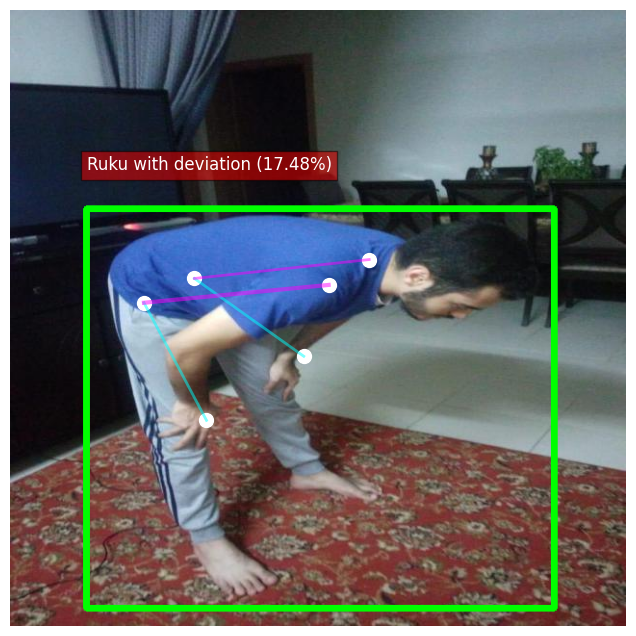

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad1 = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad1 = angle_rad1 % (2 * math.pi)
    angle_rad2 = math.atan2(a[1]-b[1], a[0]-b[0]) - math.atan2(c[1]-b[1], c[0]-b[0])
    angle_rad2 = angle_rad2 % (2 * math.pi)
    return math.degrees(min(angle_rad1, angle_rad2))

# Function to check if the pose resembles the ruku position in Salat
def is_ruku_pose(landmarks):
    # Get relevant landmarks (e.g., shoulders, hips)
    left_hip = (landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y)
    right_hip = (landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y)
    left_shoulder = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)
    right_shoulder = (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
    left_knee = (landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y)
    right_knee = (landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y)

    # Calculate angles between lines formed by hip to shoulder and hip to knee
    angle_left = abs(90 - calculate_angle(left_knee, left_hip, left_shoulder))
    angle_right = abs(90 - calculate_angle(right_knee, right_hip, right_shoulder))
    # Define condition for ruku pose (e.g., angles within a range around 90 degrees)
    ruku_angle_threshold = 30
    if angle_left <= ruku_angle_threshold or angle_right <= ruku_angle_threshold:
        return True, min(abs(angle_left), abs(angle_right)) / 100 * 100  # Calculate error percentage
    else:
        return False, 0

# Function to process image and detect ruku pose
def process_image(image_path):
    # Load Model
    results = model.predict(image_path)

    for r in results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    x1, y1, x2, y2 = bounding_box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    Perfect_Threshold = 5;
    if results.pose_landmarks:
        # Check if pose resembles ruku pose
        is_ruku, error_percentage = is_ruku_pose(results.pose_landmarks.landmark)
        if is_ruku and error_percentage > Perfect_Threshold:
            print("Ruku pose detected with an error of {:.2f}%.".format(error_percentage-Perfect_Threshold))
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            if error_percentage <= 15:
                bg_color = 'green'
            else:
                bg_color = 'red'
            plt.text(x1, y1 - 40, "Ruku with deviation ({:.2f}%)".format(error_percentage-Perfect_Threshold), color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku and error_percentage <= Perfect_Threshold:
            print("Perfect Ruku pose detected")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            bg_color = 'green'
            plt.text(x1, y1 - 40, "Ruku with no deviation", color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku is False:
            print("Ruku pose not detected.")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines connecting hip to shoulder and hip to knee
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)

            # Add text indicating not ruku in the top of the image
            plt.text(x1, y1 - 40, "Not Ruku Pose", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            plt.axis('off')
            plt.show()
    else:
        print("No pose detected in the image.")


# Example usage:
process_image(ruku_image_urls[2])


image 1/1 /content/drive/MyDrive/Hassana/Images/ruku4.jpg: 640x640 1 ruku, 314.7ms
Speed: 3.3ms preprocess, 314.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8137])
data: tensor([[158.8835, 213.7249, 519.4921, 551.4785,   0.8137,   1.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[339.1878, 382.6017, 360.6085, 337.7536]])
xywhn: tensor([[0.5300, 0.5978, 0.5635, 0.5277]])
xyxy: tensor([[158.8835, 213.7249, 519.4921, 551.4785]])
xyxyn: tensor([[0.2483, 0.3339, 0.8117, 0.8617]])
Bounding box coordinates (x1, y1, x2, y2): 158.883544921875 213.724853515625 519.4920654296875 551.4784545898438
Perfect Ruku pose detected


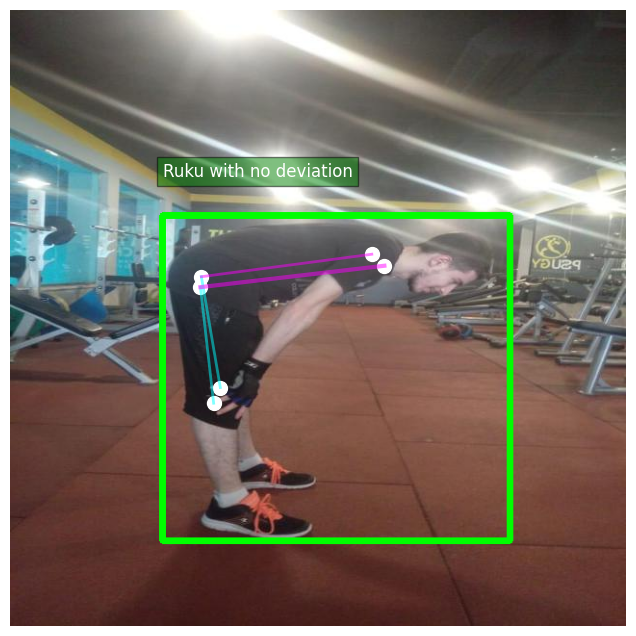

In [ ]:
process_image(ruku_image_urls[3])


image 1/1 /content/drive/MyDrive/Hassana/Images/takbeer1.jpg: 640x640 1 takbeer, 230.7ms
Speed: 2.7ms preprocess, 230.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.8985])
data: tensor([[ 97.0933,  81.4096, 524.2372, 588.5375,   0.8985,   3.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[310.6653, 334.9735, 427.1439, 507.1279]])
xywhn: tensor([[0.4854, 0.5234, 0.6674, 0.7924]])
xyxy: tensor([[ 97.0933,  81.4096, 524.2372, 588.5375]])
xyxyn: tensor([[0.1517, 0.1272, 0.8191, 0.9196]])
Bounding box coordinates (x1, y1, x2, y2): 97.09332275390625 81.40960693359375 524.2371826171875 588.5374755859375


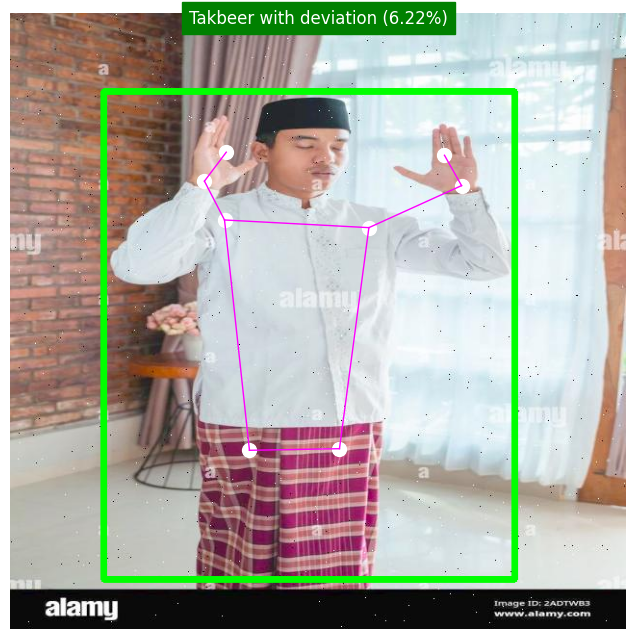

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad = angle_rad % (2 * math.pi)
    return math.degrees(angle_rad)

# Function to check if the pose resembles the Takbeer position in Salat
def is_takbeer_pose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_index = landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value]
    right_index = landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value]

    # Check if left and right shoulders are on the same line
    if abs(left_shoulder.y - right_shoulder.y) < 0.05:
        # Check if distance between right hip and right shoulder in y-direction is big enough
        if right_hip.y - right_shoulder.y > 0.3:
            # Check if wrists are above the shoulders
            if left_wrist.y < left_shoulder.y and right_wrist.y < right_shoulder.y:
                # Check if index fingers are above the shoulders
                if left_index.y < left_shoulder.y and right_index.y < right_shoulder.y:
                    return True, abs(abs(left_shoulder.y)-abs(right_shoulder.y)) / 0.2 * 100
    return False, 0

# Function to process image and detect Takbeer pose
def process_image(image_path):

    model_results = model.predict(image_path)

    for r in model_results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:

        # Draw bounding box
        x1, y1, x2, y2 = bounding_box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)
        # Check if pose resembles Takbeer pose

        is_takbeer, error = is_takbeer_pose(results.pose_landmarks.landmark)
        if is_takbeer:
            text = "Takbeer with deviation ({:.2f}%)".format(error)
            text_color = 'white'
            bg_color = 'green'
        else:
            text = "Takbeer pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text(image.shape[1] / 2, 10, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [(mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_WRIST),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_WRIST),
                       (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
                       (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)]

        # Draw points for knees, hips, and shoulders
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)
        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
process_image(takbeer_image_urls[0])



image 1/1 /content/drive/MyDrive/Hassana/Images/takbeer3.jpg: 640x640 1 takbeer, 221.4ms
Speed: 3.7ms preprocess, 221.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.9493])
data: tensor([[210.1653,  32.4023, 569.7634, 639.2633,   0.9493,   3.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[389.9644, 335.8328, 359.5981, 606.8610]])
xywhn: tensor([[0.6093, 0.5247, 0.5619, 0.9482]])
xyxy: tensor([[210.1653,  32.4023, 569.7634, 639.2633]])
xyxyn: tensor([[0.3284, 0.0506, 0.8903, 0.9988]])
Bounding box coordinates (x1, y1, x2, y2): 210.16534423828125 32.40234375 569.763427734375 639.2633056640625


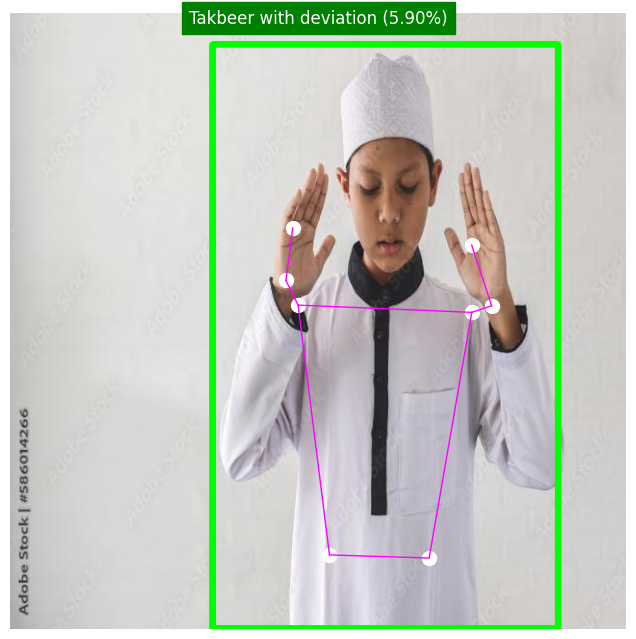

In [ ]:
process_image(takbeer_image_urls[2])


image 1/1 /content/drive/MyDrive/Hassana/Images/sujud3.jpeg: 384x640 1 sujud, 384.6ms
Speed: 3.4ms preprocess, 384.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.8789])
data: tensor([[ 54.6765,  50.1556, 218.8404, 146.2524,   0.8789,   2.0000]])
id: None
is_track: False
orig_shape: (168, 299)
shape: torch.Size([1, 6])
xywh: tensor([[136.7585,  98.2040, 164.1639,  96.0968]])
xywhn: tensor([[0.4574, 0.5845, 0.5490, 0.5720]])
xyxy: tensor([[ 54.6765,  50.1556, 218.8404, 146.2524]])
xyxyn: tensor([[0.1829, 0.2985, 0.7319, 0.8706]])
Bounding box coordinates (x1, y1, x2, y2): 54.676509857177734 50.15557861328125 218.84039306640625 146.25241088867188
1
0.0029796957969665527 0.015838921070098877
0.0029796957969665527 0.015838921070098877
2
3


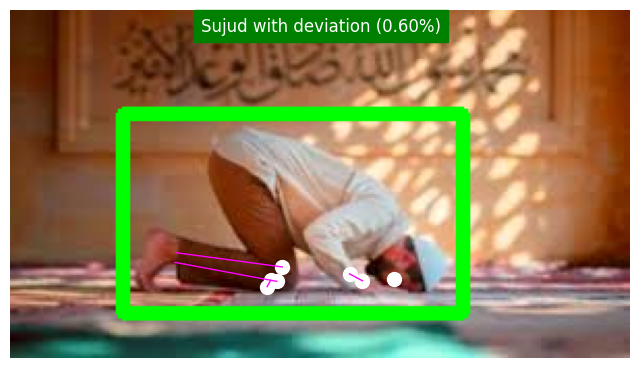

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad = angle_rad % (2 * math.pi)
    return math.degrees(angle_rad)

# Function to check if the pose resembles the Sujud position in Salat
def is_sujud_pose(landmarks):
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    nose = landmarks[mp_pose.PoseLandmark.NOSE.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]

    # 1. Knees should be below hips (indicating kneeling)
    if left_knee.y > left_hip.y and right_knee.y > right_hip.y:
        print(1)
        print(abs(left_wrist.y - nose.y),abs(right_wrist.y - nose.y) )


        # 2. Check if wrists are close to the nose's vertical position (y-coordinate difference is close to zero)
        if abs(left_wrist.y - nose.y) < 0.1 and abs(right_wrist.y - nose.y) < 0.1:
            print(abs(left_wrist.y - nose.y),abs(right_wrist.y - nose.y) )
            print(2)

            # 3. Nose should be lower than hips (indicating the head is close to the ground)
            if nose.y > left_hip.y and nose.y > right_hip.y:
                print(3)
                return True, abs(left_wrist.y - nose.y)*2 * 100

    return False, 0

# Function to process image and detect Sujud pose
def process_image(image_path):

    model_results = model.predict(image_path)

    for r in model_results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:

        # Draw bounding box
        x1, y1, x2, y2 = bounding_box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)

        # Check if pose resembles Sujud pose
        is_sujud, error = is_sujud_pose(results.pose_landmarks.landmark)
        if is_sujud:
            text = "Sujud with deviation ({:.2f}%)".format(error)
            text_color = 'white'
            bg_color = 'green'
        else:
            text = "Sujud pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text(image.shape[1] / 2, 10, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [(mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.LEFT_ANKLE),
                       (mp_pose.PoseLandmark.RIGHT_KNEE, mp_pose.PoseLandmark.RIGHT_ANKLE),
                       (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
                       (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)]

        # Draw points for knees, wrists, and nose
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                             mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.NOSE]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)

        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
image_path = "/content/drive/MyDrive/Hassana/Images/sujud3.jpeg"
process_image(image_path)



image 1/1 /content/drive/MyDrive/Hassana/Images/raising2.jpg: 640x640 1 raising, 244.5ms
Speed: 3.5ms preprocess, 244.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9249])
data: tensor([[237.7363,  53.8004, 466.2253, 614.9250,   0.9249,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[351.9808, 334.3627, 228.4890, 561.1247]])
xywhn: tensor([[0.5500, 0.5224, 0.3570, 0.8768]])
xyxy: tensor([[237.7363,  53.8004, 466.2253, 614.9250]])
xyxyn: tensor([[0.3715, 0.0841, 0.7285, 0.9608]])
Bounding box coordinates (x1, y1, x2, y2): 237.73626708984375 53.80035400390625 466.22528076171875 614.925048828125
Shoulders level
Elbows close to body
Hips above knees
Head aligned
Body straightness achieved


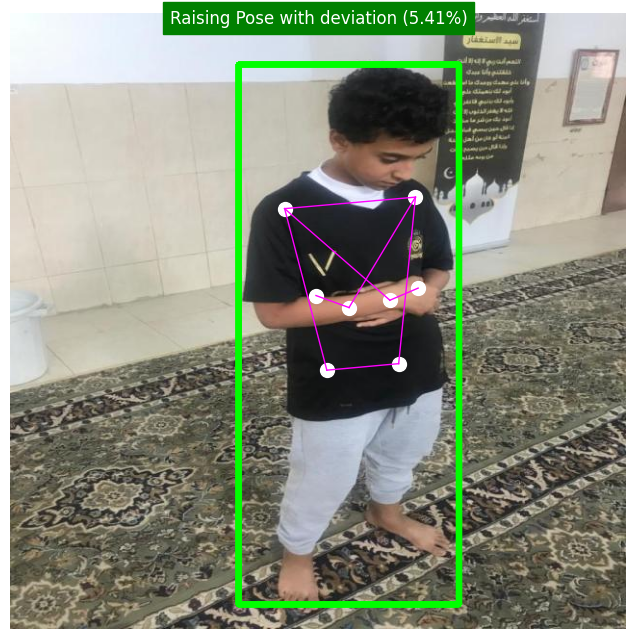

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad = angle_rad % (2 * math.pi)
    return math.degrees(angle_rad)

# Function to check if the pose resembles the "Raising" position in Salat
def is_raising_pose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    nose = landmarks[mp_pose.PoseLandmark.NOSE.value]
    chin = landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]  # Using left ear as an approximation for the chin

    # 1. Shoulders should be level (indicating upright posture)
    if abs(left_shoulder.y - right_shoulder.y) < 0.1:
        print("Shoulders level")

        # 2. Elbows should be close to the body (raised hands condition)
        if abs(left_elbow.x - left_shoulder.x) < 0.1 and abs(right_elbow.x - right_shoulder.x) < 0.1:
            print("Elbows close to body")

            # 3. Hips should be above the knees (indicating upward movement)
            if left_hip.y < left_knee.y and right_hip.y < right_knee.y:
                print("Hips above knees")

                # 4. Head should be aligned (nose and chin are aligned)
                if abs(nose.x - chin.x) < 0.05:
                    print("Head aligned")

                    # 5. Body should be straight (upper body is upright, not bent)
                    if abs(left_hip.y - left_shoulder.y) < 0.3 and abs(right_hip.y - right_shoulder.y) < 0.3:
                        print("Body straightness achieved")
                        return True, abs(left_shoulder.y - left_hip.y)/5 * 100

    return False, 0

# Function to process image and detect Raising pose
def process_image(image_path):

    model_results = model.predict(image_path)

    for r in model_results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:

        # Draw bounding box
        x1, y1, x2, y2 = bounding_box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)

        # Check if pose resembles Raising pose
        is_raising, error = is_raising_pose(results.pose_landmarks.landmark)
        if is_raising:
            text = "Raising Pose with deviation ({:.2f}%)".format(error)
            text_color = 'white'
            bg_color = 'green'
        else:
            text = "Raising pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text(image.shape[1] / 2, 10, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [
            (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
            (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
            (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_HIP),
            (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
            (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_WRIST),
            (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_WRIST),
            (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
            (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)
        ]

        # Draw points for knees, hips, shoulders, and wrists
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                         mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                         mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
            plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                        results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                        color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)

        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                   landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                   connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
image_path = "/content/drive/MyDrive/Hassana/Images/raising2.jpg"
process_image(image_path)
